In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
dataset = pd.read_csv("C:\\Users\\Praveen\\ExcelR Assignment Question\\Company_Data.csv")
dataset

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
dataset.shape

(400, 11)

In [4]:
# Complete the Fraud dataset
label_encoder = preprocessing.LabelEncoder()
dataset['ShelveLoc']= label_encoder.fit_transform(dataset['ShelveLoc'])
dataset['Urban']= label_encoder.fit_transform(dataset['Urban'])
dataset['US']= label_encoder.fit_transform(dataset['US'])

In [5]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [6]:
dataset.isnull().sum() #checking null values in dataset 

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
data=pd.DataFrame(dataset)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
#changing numerical data into categorical data
row_indexes=data[data['Sales'] < 10].index
row_indexes_1=(data[data['Sales'] >= 10]).index

In [9]:
data.loc[row_indexes,'Sales']= "Yes"
data.loc[row_indexes_1,'Sales']= "No"

In [10]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Yes,138,73,11,276,120,0,42,17,1,1
1,No,111,48,16,260,83,1,65,10,1,1
2,No,113,35,10,269,80,2,59,12,1,1
3,Yes,117,100,4,466,97,2,55,14,1,1
4,Yes,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,No,138,108,17,203,128,1,33,14,1,1
396,Yes,139,23,3,37,120,2,55,11,0,1
397,Yes,162,26,12,368,159,2,40,18,1,1
398,Yes,100,79,7,284,95,0,50,12,1,1


In [11]:
x = data.drop("Sales",axis=1)
y = data['Sales']

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 1) # Splitting data into training and testing data set

### Splitting data into training and testing data set


In [13]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

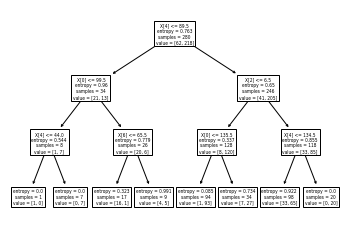

In [16]:
tree.plot_tree(model);  #PLot the decision tree

In [17]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

Yes    112
No       8
dtype: int64

In [18]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,No,Yes
Sales,,
No,4,13
Yes,4,99


In [20]:
np.mean(preds==y_test)*100

85.83333333333333